In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('breast-cancer.csv')  # Replace 'path_to_your_csv_file.csv' with the path to your CSV file

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [4]:
# Convert the 'diagnosis' column: M -> 1, B -> 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [5]:
from sklearn.model_selection import train_test_split

# Exclude 'id' column and split data into features and target
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 97.37%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



 Correlation Heatmap
A correlation heatmap will help us visualize the relationships between different "mean" features. Correlation values range from -1 to 1, where:

1 indicates a perfect positive correlation: as one feature increases, the other also does.
-1 indicates a perfect negative correlation: as one feature increases, the other decreases.
0 indicates no correlation: changes in one feature do not predict changes in the other.

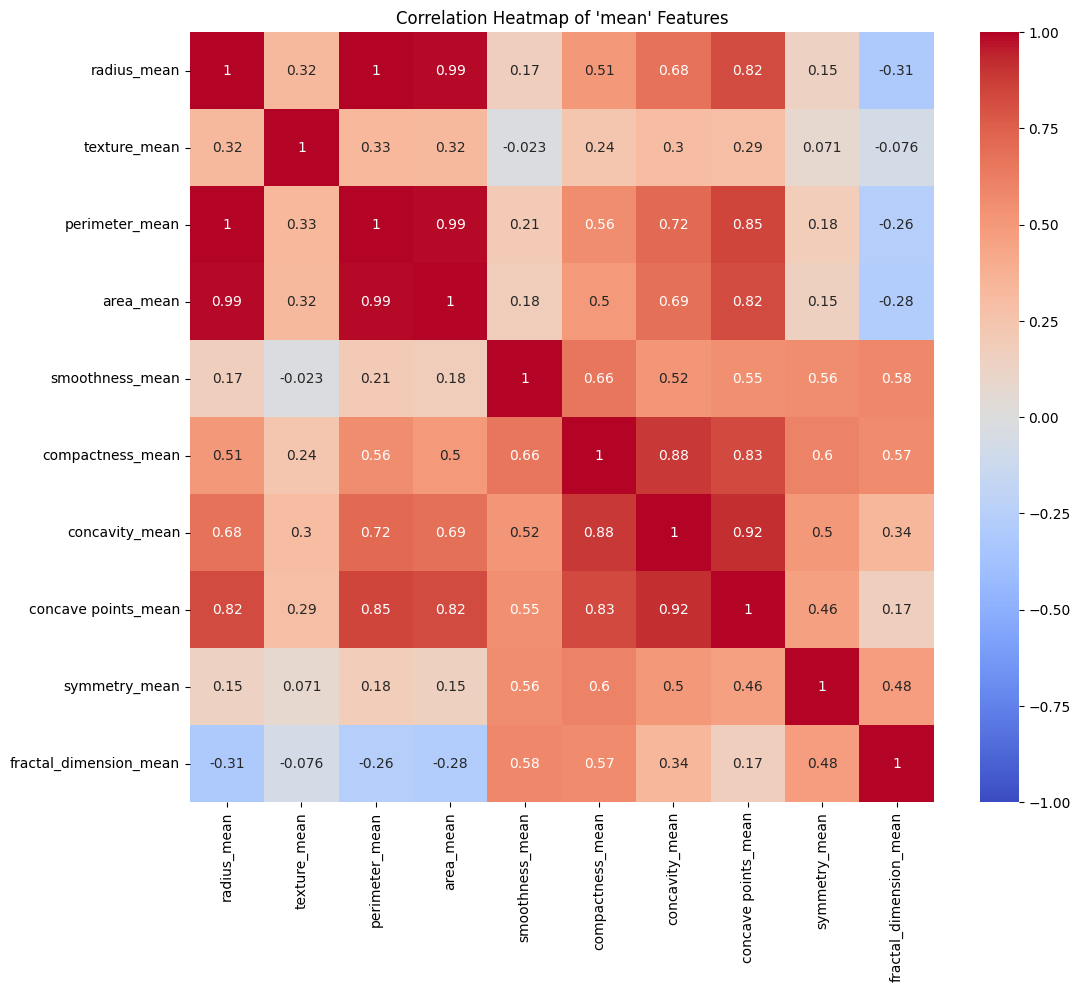

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the 'mean' features for correlation
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Compute the correlation matrix
corr_matrix = data[mean_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of 'mean' Features")
plt.show()


From the heatmap, we can observe the following:

Features like radius_mean, perimeter_mean, and area_mean are highly correlated with each other. This is expected as the radius of a circle is directly related to its perimeter and area.
concave points_mean also shows a high correlation with radius_mean, perimeter_mean, and area_mean.
compactness_mean and concavity_mean are also somewhat correlated.
Such insights can be valuable in multiple ways:

Feature Selection: When features are highly correlated, they carry similar information. In some cases, this can be redundant, and you might consider dropping some of these features to reduce the dimensionality of the dataset.
Engineering New Features: Understanding correlations can also help in generating new features that might improve the model's performance.


2. Pairplots
Pairplots are a great way to visualize pairwise relationships in a dataset. By plotting pairwise relationships for a select group of features, we can visually inspect the nature of the relationship between two features, and how they relate with respect to the target variable (in this case, the diagnosis).

For simplicity, we'll select a subset of the "mean" features to visualize with pairplots. Let's choose the following:

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean

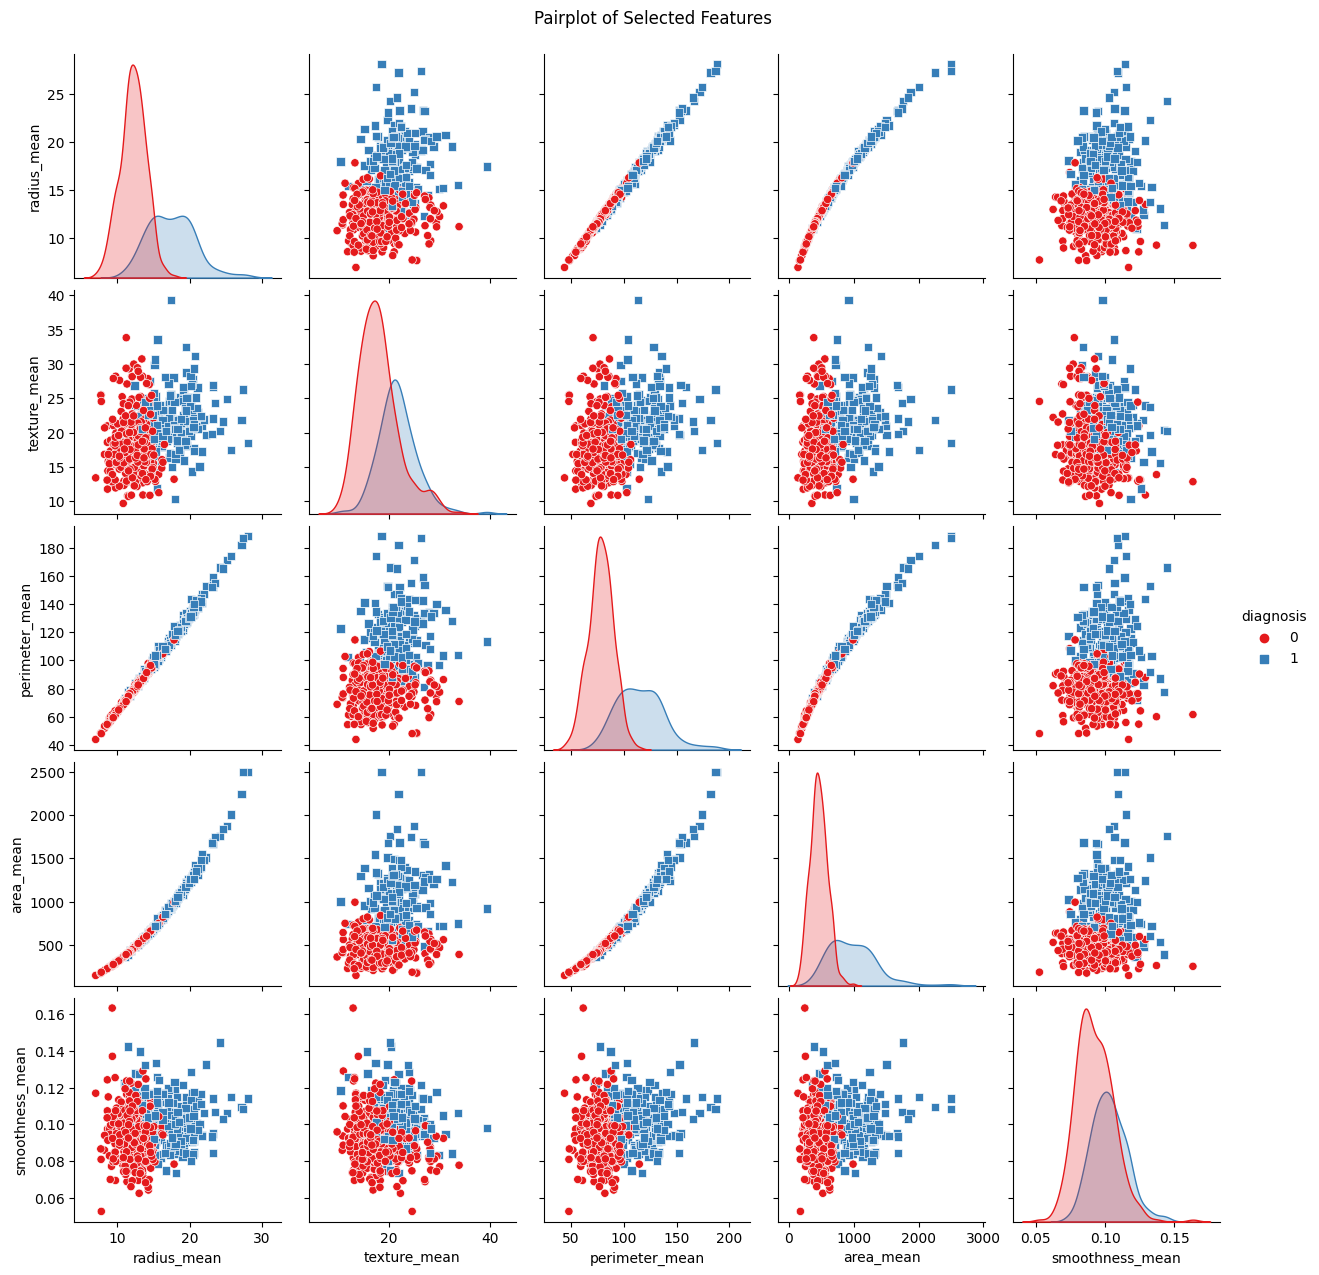

In [10]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for the pairplot
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']

# Generate the pairplot
sns.pairplot(data[selected_features], hue='diagnosis', markers=["o", "s"], palette="Set1")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


Diagonal Histograms:

These histograms show the distribution of individual features for both benign (coded as 0) and malignant (coded as 1) tumors.
For instance, looking at the radius_mean histogram, we observe that benign tumors tend to have a smaller mean radius compared to malignant tumors.
Scatter Plots:

The scatter plots depict the relationship between pairs of features.
For example, looking at the scatter plot between radius_mean and perimeter_mean, we notice a linear relationship, which is expected as the perimeter is directly related to the radius.
Most importantly, for many of these scatter plots, there is a clear separation between benign and malignant tumors. This separation indicates that these features hold discriminatory information that can be leveraged by our machine learning model.
Color and Markers:

The colors (blue for benign and red for malignant) help in distinguishing between the two classes. We can observe that for many feature combinations, malignant tumors (red squares) tend to have higher values compared to benign tumors (blue circles). For instance, in the scatter plot between radius_mean and texture_mean, the red squares are generally positioned higher and to the right, indicating higher values for both features.

From this pairplot, we can infer:

There are clear distinctions between benign and malignant tumors for the selected features.
Features like radius_mean, perimeter_mean, and area_mean show strong linear relationships with each other, which is consistent with our earlier observation from the correlation heatmap.
The distributions of these features are different for benign and malignant tumors. For instance, malignant tumors tend to have a larger mean radius, perimeter, and area compared to benign tumors.


3. Boxplots for Feature Distributions by Diagnosis
Boxplots are excellent tools for visualizing the distribution of a numeric variable across different categories. They provide a summary of the central tendency, dispersion, and shape of the distribution.

We'll create boxplots for a few selected features to observe how their distributions differ for benign and malignant tumors. This will help us understand which features have a significant difference in distributions between the two classes and may be more informative for classification.

Let's choose the following features for the boxplots:

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean

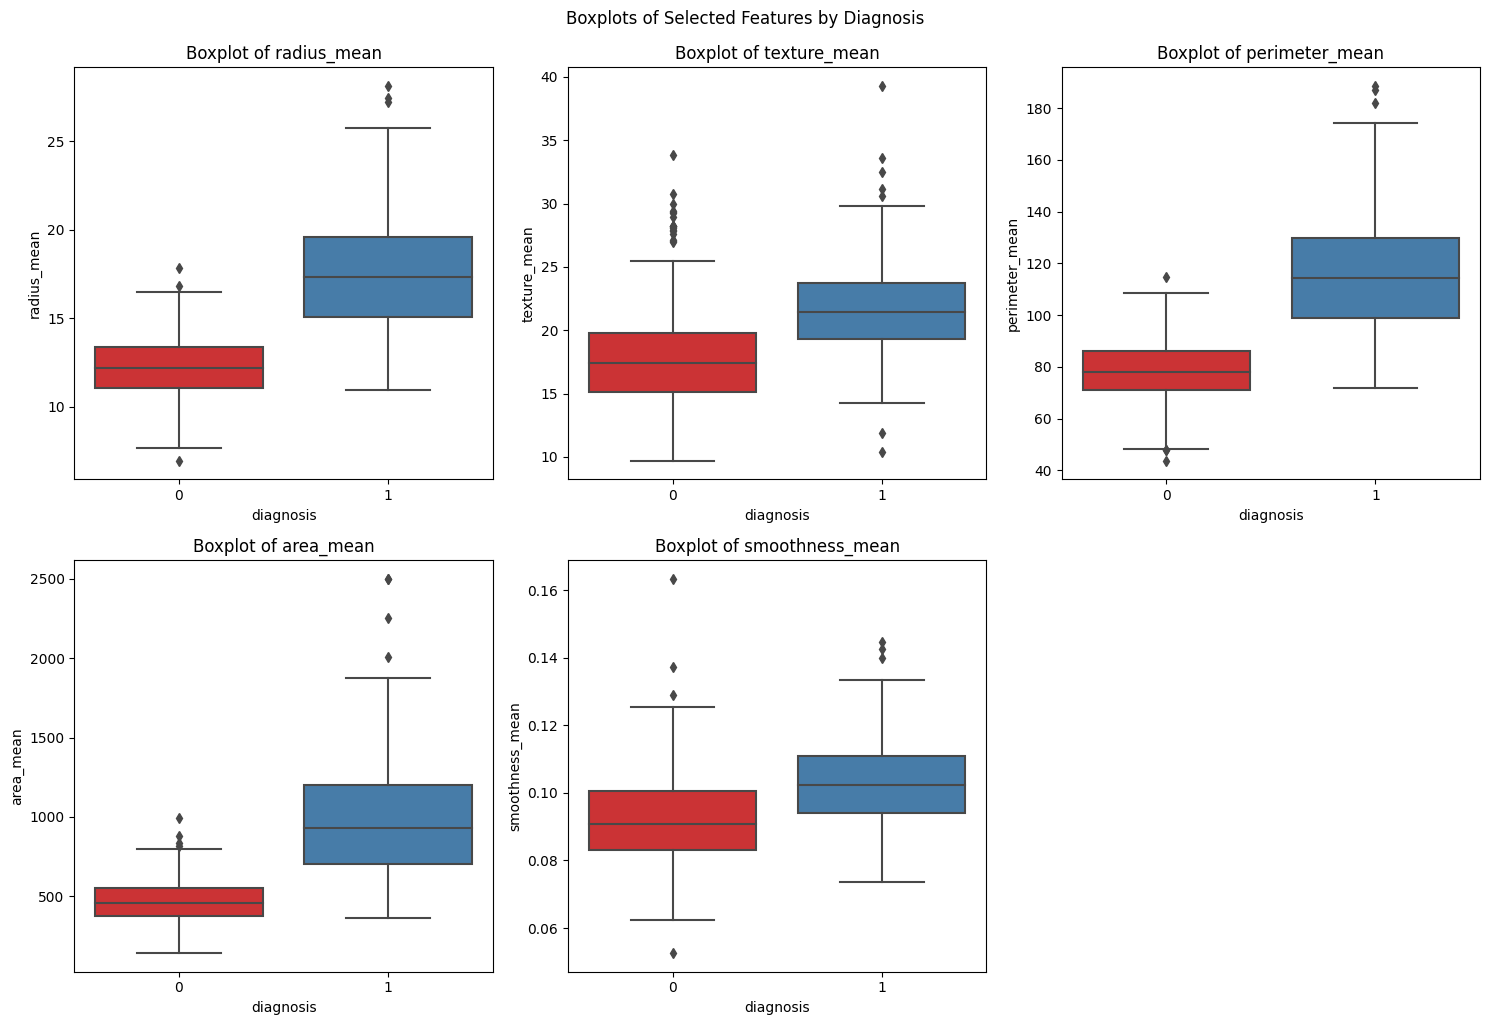

In [11]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Plotting boxplots for each selected feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=data, palette="Set1")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.suptitle("Boxplots of Selected Features by Diagnosis", y=1.02)
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the scaled training data
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [14]:
# Extracting feature importances
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)


                    Feature  Importance
23               area_worst    0.153892
27     concave points_worst    0.144663
7       concave points_mean    0.106210
20             radius_worst    0.077987
6            concavity_mean    0.068001
22          perimeter_worst    0.067115
2            perimeter_mean    0.053270
0               radius_mean    0.048703
3                 area_mean    0.047555
26          concavity_worst    0.031802
13                  area_se    0.022407
21            texture_worst    0.021749
25        compactness_worst    0.020266
10                radius_se    0.020139
5          compactness_mean    0.013944
1              texture_mean    0.013591
12             perimeter_se    0.011303
24         smoothness_worst    0.010644
28           symmetry_worst    0.010120
16             concavity_se    0.009386
4           smoothness_mean    0.007285
19     fractal_dimension_se    0.005321
15           compactness_se    0.005253
29  fractal_dimension_worst    0.005210


Random Forest Performance:
Accuracy: The Random Forest model achieved an accuracy of 96.49% on the test data. This is slightly lower than the Logistic Regression model's accuracy of 97.37%. However, it's still an excellent result.

Precision and Recall:

For benign tumors (0): The model has a precision of 96%, meaning 96% of the tumors it predicted as benign were actually benign. The recall is 99%, which means it identified 99% of all actual benign tumors.
For malignant tumors (1): The precision is 98%, and the recall is 93%. This means that 98% of the predictions for malignant tumors were correct, and it identified 93% of all actual malignant tumors.
F1-Score: The F1-scores for both benign and malignant tumors are high, indicating a good balance between precision and recall for both classes.

Feature Importance:
The Random Forest algorithm has provided us with a ranking of features based on their importance in making predictions:

Most Important Features:

area_worst: This feature had the highest importance, suggesting that the worst (or largest mean) area of the tumor plays a significant role in predicting its malignancy.
concave points_worst: The worst value of the number of concave portions of the contour also had high importance.
concave points_mean: The average number of concave portions of the contour is another top feature.
radius_worst and concavity_mean: The worst radius and average concavity also ranked high.
These top features primarily represent the size, shape, and contour characteristics of the tumors.

Least Important Features:

Features like symmetry_mean, fractal_dimension_mean, and concave points_se had relatively lower importance. While they contribute to the model's decision, their impact is less compared to the top features.

In [16]:
from sklearn.preprocessing import StandardScaler

# Re-scaling the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing 10-fold cross-validation again
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=10, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

mean_cv_score, std_cv_score


(0.9631578947368421, 0.03182167920564395)

nterpretation of the Output:

Mean Cross-Validation Score: The average accuracy across the 10 iterations is approximately 96.32%. This confirms that our model performs consistently well across different splits of the data.

Standard Deviation of Cross-Validation Score: The standard deviation of about 3.18% indicates the variability in the model's performance across different splits. A lower standard deviation would indicate that the model's performance is consistent across various splits, while a higher value would suggest more variability. In this case, a standard deviation of 3.18% is reasonable given the high mean accuracy.



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Initialize GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Step 3: Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Step 4: Evaluate results
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 108 candidates, totalling 540 fits


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 50},
 0.9631268436578171)

The GridSearchCV has provided the best hyperparameters for the Random Forest classifier based on the combinations it tested:

max_depth: None - This means the trees in the Random Forest are expanded until they contain less than the minimum samples required to split a node. In other words, the trees are fully grown.

min_samples_leaf: 1 - This is the default value and indicates that a leaf node can have just one sample.

min_samples_split: 5 - This means an internal node must have at least 5 samples before it can be split to create further branches.

n_estimators: 50 - This indicates the Random Forest classifier should be built with 50 trees.

The accuracy achieved with this set of hyperparameters is approximately
96.31
%
96.31%, which is very close to the accuracy we observed earlier without hyperparameter tuning.

These hyperparameters represent a balance between bias and variance, preventing overfitting while still achieving high accuracy. The fact that the tuned model's performance is similar to the default model's performance suggests that the Random Forest algorithm's default parameters are already quite optimized for this dataset. However, it's always beneficial to validate this through techniques like hyperparameter tuning.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Use the best hyperparameters from the grid search
final_rf_classifier = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

# Train the classifier using the scaled training data
final_rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred_final_rf = final_rf_classifier.predict(X_test_scaled)

# Calculate accuracy
final_accuracy_rf = accuracy_score(y_test, y_pred_final_rf)
print(f"Final Random Forest Accuracy: {final_accuracy_rf * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred_final_rf))


Final Random Forest Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Accuracy: The accuracy remains approximately
96.49
%
96.49%, which confirms that the model performs robustly with the dataset.

Precision and Recall:

For benign tumors (0): The precision is
96
%
96%, and the recall is
99
%
99%. This means that
96
%
96% of the tumors predicted as benign were truly benign, and the model identified
99
%
99% of all actual benign tumors.
For malignant tumors (1): The precision is
98
%
98%, and the recall is
93
%
93%. This implies that
98
%
98% of the predictions for malignant tumors were accurate, and the model identified
93
%
93% of all actual malignant tumors.
F1-Score: The F1-scores for both benign and malignant tumors remain high, showcasing a good balance between precision and recall for both classes.

In [20]:
import pickle

# Save the trained Random Forest model and the scaler
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(final_rf_classifier, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [21]:
!pip install Flask


In [23]:
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=d2968cbb8af0ed44f310f8e6aabe219faadf52dc4b6c3e34a7495789eac28431
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [25]:
from flask import Flask, request, jsonify
import pickle
from pyngrok import ngrok

# Initialize Flask app
app = Flask(__name__)

# Load the model and scaler
with open('rf_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from POST request
    data = request.get_json(force=True)

    # Scale the input data
    scaled_data = scaler.transform([data['features']])

    # Predict using the loaded model
    prediction = model.predict(scaled_data)

    # Return the prediction
    return jsonify(int(prediction[0]))

if __name__ == '__main__':
    # Setup ngrok
    public_url = ngrok.connect(addr="5000", proto="http", bind_tls=True)
    print("Public URL:", public_url)
    app.run(port=5000)


Public URL: NgrokTunnel: "https://ae8e-35-198-218-156.ngrok.io" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:07:16] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:07:17] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:08:31] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:08:32] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:10:09] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:10:10] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:11:15] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:11:16] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:11:18] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2023 22:11:19] "GET /favicon.ico HTTP/1.1" 404 -
I

selecting import features for retraining with only 5 features instead of 30


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('breast-cancer.csv')

data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#check for missing value
missing_values = data.isnull().sum()

In [14]:
# Load the dataset
data = pd.read_csv('breast-cancer.csv')

# Check for missing values
missing_values = data.isnull().sum()

# Convert the 'diagnosis' column: M -> 1, B -> 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

missing_values


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
# Splitting data into features and target
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Standardize the data
scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X)

# Initialize and train a Random Forest classifier
rf_classifier_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_full.fit(X_scaled, y)

# Extracting feature importances
feature_importances = rf_classifier_full.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Selecting the top 5 features
top_5_features = features_df['Feature'].head(5).tolist()

top_5_features


NameError: ignored

In [10]:
# Keeping only the top 5 features
X_top_5 = X[top_5_features]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_top_5, y, test_size=0.2, random_state=42)

# Rescale the data based on the top 5 features
scaler_top_5 = StandardScaler()
X_train_scaled = scaler_top_5.fit_transform(X_train)
X_test_scaled = scaler_top_5.transform(X_test)

# Initialize and train the Random Forest classifier using the top 5 features
rf_classifier_top_5 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_top_5.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_top_5 = rf_classifier_top_5.predict(X_test_scaled)

# Calculate accuracy
accuracy_top_5 = accuracy_score(y_test, y_pred_top_5)

accuracy_top_5


NameError: ignored